<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Regression%20Models/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading dataset:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [13]:
df = df.drop(labels='Index', axis=1)

In [14]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [16]:
#Missing values:
df.isnull()

,Height(Inches),Weight(Pounds)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


<Axes: >

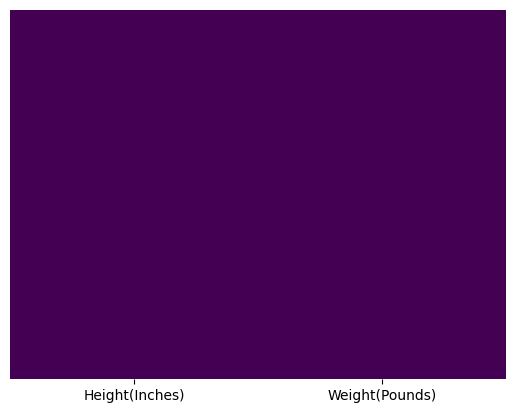

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
#(finding correlation b/w them:)
corr_matrix = df.corr()

In [24]:
corr_matrix

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


<Axes: >

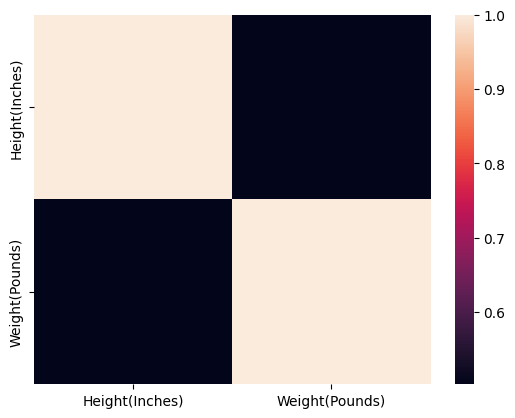

In [20]:
sns.heatmap(corr_matrix)

Text(0, 0.5, 'Height in Inches')

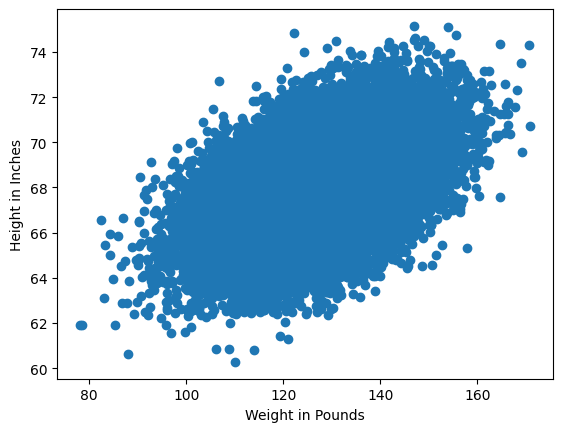

In [23]:
#Visualization of realtion ship b/w two features here
#for correlation and for performance metrix:
#scatter plot
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'])
plt.xlabel('Weight in Pounds')
plt.ylabel('Height in Inches')

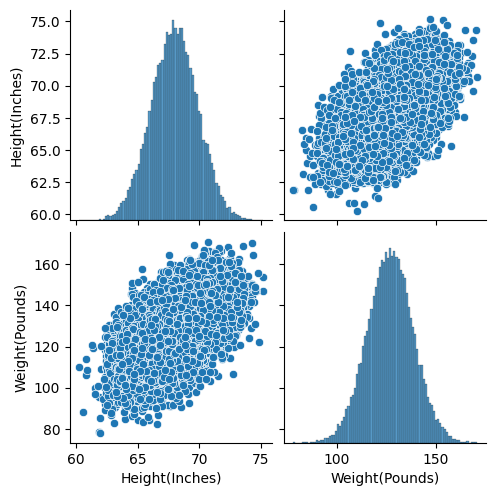

In [25]:
sns.pairplot(df)

In [36]:
X_series = df['Weight(Pounds)'] #no importance to column
np.array(X_series).shape

(25000,)

In [37]:
type(X_series)

pandas.core.series.Series

In [38]:
#height weight are not highly correlated-but let's continue linear correlation.
#Dividing features:
#Independent and Dependent Features
#X = df['Weight'] Series - but independent features should be in the form of dataframe or 2-D array.
X = df[['Weight(Pounds)']]
np.array(X).shape #in multi linear this columns increases.

(25000, 1)

In [39]:
type(X)

pandas.core.frame.DataFrame

In [40]:
X_series.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [41]:
X.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [42]:
#dependent feature- dont have to worry to much about dimension.
#as it has only one value- can be series as well
y = df['Height(Inches)']

In [43]:
type(y)

pandas.core.series.Series

In [44]:
y.head()

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [46]:
y #can be series or 1-D

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [47]:
np.array(y).shape

(25000,)

In [52]:
#Training Testing Data Split:
#training data - used for training purpose.
#test data - used for testing predictions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)-This gives random split of 25% test and 75% train.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)-all have same data selected.


In [56]:
X_train.shape #2 Dimension

(18750, 1)

In [57]:
y_train.shape

(18750,)

In [59]:
X_test.shape

(6250, 1)

In [60]:
y_test.shape

(6250,)

In [61]:
#Standardization: X(kg) y(cm) in linear reg we use gradient descent So if we have big value it takes time to reach global minima.
#This is not suitable solution:
#So to reach global moinima it takes time- So optimization takes time.

#Good approach - Take each  Independent feature and apply formula of Z-score:
#Z-score convert all values with mean = 0 and S.D = 1.
#Z-score = xi-mean/s.D and then after applying this all values will be converted to mean=0 and S.D is 1




In [62]:
#sklearn algoruthm name - can see code
#sklearn standard scaler


In [63]:
from sklearn.preprocessing import StandardScaler
#need to standardize input features and not on output as gradient descent applied on independent feature


In [76]:
scaler = StandardScaler() #intialiaze

In [77]:
scaler

StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train) #Z-score is applied and changed values are returned

In [79]:
X_train

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [80]:
scaler

StandardScaler()

In [108]:
#Doing same for test data:
#here we apply same formula and used mean and deviation from training data. -using transform
#if fit_transform is used - mean and sd will be calcualetd above for this data as well.
#we do this bcz of data leakage(we dont want training data to know anything about test data)
#test data should be new data to model.
X_test = scaler.transform(X_test)

In [109]:
X_test

array([[ 6.10432606e-01],
       [-1.28826166e+00],
       [ 7.55189658e-01],
       ...,
       [ 7.28034950e-01],
       [-1.15886846e+00],
       [-1.02471986e-03]])

In [83]:
scaler

StandardScaler()

In [84]:
#Model: Linear Regression on Standardized Data (after removing all missing values and cleaning data and splitting data)

#Simple Linear regression:
from sklearn.linear_model import LinearRegression

In [86]:
#any libraries from sklearn. Will first intialiaze the object
regression = LinearRegression() #Intialize linear regression model

#Default parameters-fit_intercept-whether to calculate the intercept for this model or not.
#if standarization is not done then normalize can be set to True.
#n_jobs - if set to -1 will use all processors in system in converging and training step.
#Positive is to make coeffiecients to be +ve. (but not mandatory)

#Return parameters- coefficeients, rank of matrix, singular values of X, intercept, names of features.


In [89]:
regression.fit(X_series, y) #it expects 2-D array as independent/input feature.


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [90]:
regression.fit(X_train, y_train)

LinearRegression()

In [91]:
regression

LinearRegression()

In [96]:
print("Coeffiecent/Slope:",regression.coef_) #This says 1 unit movement in x(height feature) leads to 0.94 movement in weight value.

print("Intercept:", regression.intercept_) #This is the point where line meets y axis.(x=0)
#1 independent feature - y=mx+c or h(x)=Q0+Q1x
#Q0 - intercept
#Q1 - coefficient
#x - data points or that feature

Coeffiecent/Slope: [0.94883892]
Intercept: 67.9938252704


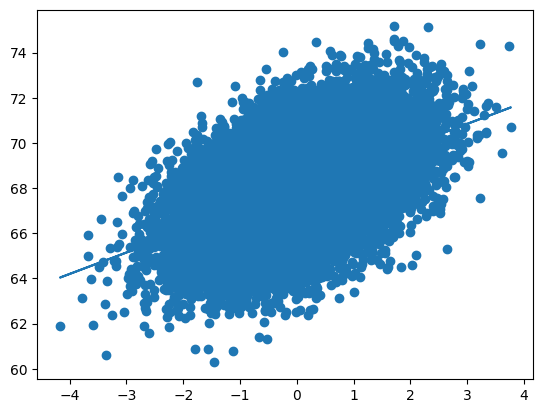

In [98]:
#Plotting best fit line:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
#This is the best fit line created with coeffient of 0.94 and intercept of 67.993

In [99]:
#predicting test data:
y_pred=regression.predict(X_test)

In [ ]:
#predicted height = intercept + coeff_(weights)
#height_pred = 67.9 + 0.9(weights)

In [107]:
y_pred

array([68.57302749, 66.77147246, 68.71037861, ..., 68.68461317,
       66.89424577, 67.99285298])

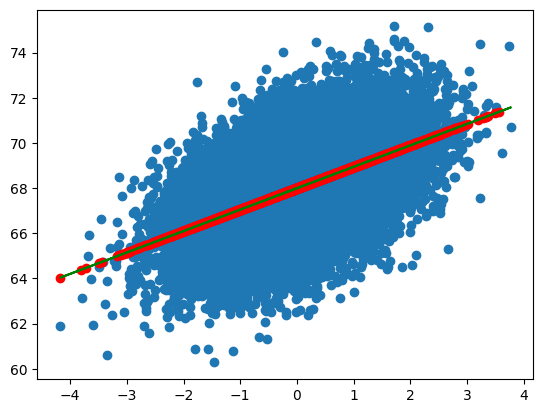

In [175]:
#Data Points:
plt.scatter(X_train, y_train)
#Best Fit line
plt.plot(X_train, regression.predict(X_train), color='green')
plt.scatter(X_test, y_pred, color="red")

In [176]:
print("Error:", y_pred-y_test)

Error: 6868     0.148557
24016   -1.125158
9668     1.051159
13640   -1.078069
14018   -3.190397
           ...   
24717    2.446492
2578     0.343651
10121   -0.561607
21601    2.316046
3474     4.441363
Name: Height(Inches), Length: 6250, dtype: float64


In [ ]:
#Cost Functions:

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.733850755074356
Mean Absolute Error: 1.3167329557727847
Root Mean Squared Error: 1.65343604505114


In [100]:
#performance metrics - to check result
#R squared
#Adjusted R squared

#### R squared:
**R^2 = 1-SSR/SST**

R^2 = coeffiecient of determination.

SSR = sum of squares of residuals

SST = Sum of total squares

In [102]:
from sklearn.metrics import r2_score

In [103]:
score = r2_score(y_test, y_pred)
print(score)

0.25913703796869514


#### Adjusted R Squared

**Adj R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where,
R2 - R squared
n - no.of observations
k - no. of predictor variables

In [104]:
adjusted_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


In [106]:
adjusted_score #no diff as only one feature

0.2590184619504442

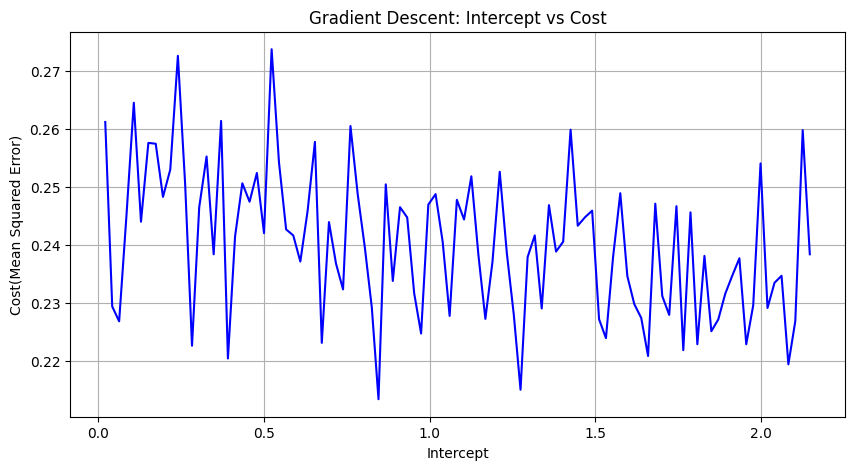

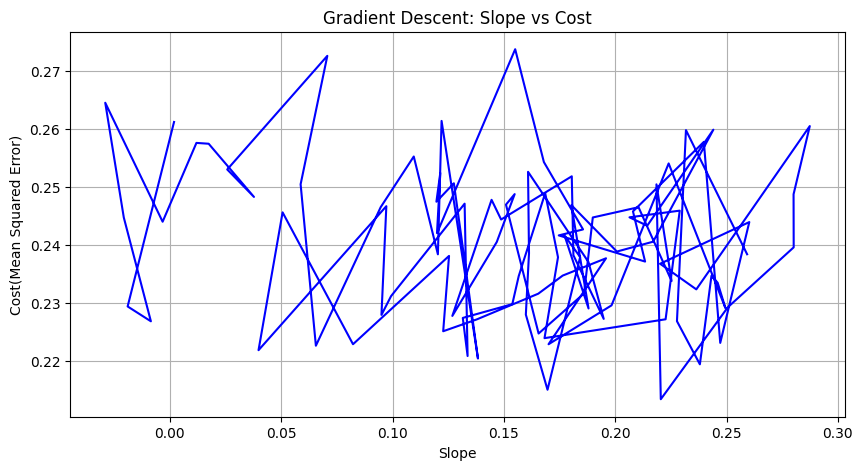

In [173]:
X_train = X_train.reshape(-1, 1)  # Make sure X_train has shape (n_samples, 1)
y_train = y_train.flatten()  # Flatten y_train if it's a 2D array

learning_rate = 3
m = len(X_train)
beta_0 = 0
beta_1 = 0

cost_history = []
intercept_history = []
slope_history = []

for i in range(100):
  y_hat = beta_0 + beta_1*X_train[i]
  cost = (1/m)*np.sum((y_train[i]-y_hat)**2)
  gradient_0 = (-2/m)*np.sum(y_train[i]-y_hat.flatten())
  gradient_1 = (-2/m)*np.sum((y_train[i]-y_hat.flatten())*X_train[i].flatten())
  beta_0 -= learning_rate*gradient_0
  beta_1 -= learning_rate*gradient_1

  cost_history.append(cost)
  intercept_history.append(beta_0)
  slope_history.append(beta_1)

plt.figure(figsize=(10,5))
plt.plot(intercept_history, cost_history, color="blue")
plt.title('Gradient Descent: Intercept vs Cost')
plt.xlabel('Intercept')
plt.ylabel('Cost(Mean Squared Error)')
plt.grid(True)

plt.figure(figsize=(10,5))
plt.plot(slope_history, cost_history, color="blue")
plt.title('Gradient Descent: Slope vs Cost')
plt.xlabel('Slope')
plt.ylabel('Cost(Mean Squared Error)')
plt.grid(True)

In [160]:
#OLS Linear Regression:
import statsmodels.api as sm


In [162]:
model = sm.OLS(y_train, X_train).fit()
#in ols we need to give endog-output and exog-input
prediction = model.predict(X_test)
print(prediction)

[ 5.79202216e-01 -1.22235281e+00  7.16553341e-01 ...  6.90787897e-01
 -1.09957950e+00 -9.72294085e-04]


In [164]:
print(model.summary())

#so OLs and sklearn almost hold same strategy.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                      0.0561
Time:                        01:49:50   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [168]:
#prediction for new data:
regression.predict(scaler.transform([[100]])) #provide in 2-d
#this is happening bcz we missed  standardization.

array([162.87771745])